In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import curvedsky as cs
import binning

In [2]:
sys.path.append('../')

In [12]:
%load_ext autoreload
%autoreload 2
from lbxs4.cmb import CMBLensed
from lbxs4.simulations import LBSky
from lbxs4.filtering import Filtering,FiltCoadd
from lbxs4.multitracer import CoaddKappa
from lbxs4.delensing import Delenser
from lbxs4.config import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
nside = 1024
maskpath = os.path.join(MASKDIR, 'LB_Nside2048_fsky_0p8_binary.fits')

In [7]:
cmb = CMBLensed()

In [8]:
dire = '/pscratch/sd/l/lonappan/LBxS4'

In [11]:
lb_sky = LBSky(dire,512)

In [13]:
filt = FiltCoadd(dire,lblib=lb_sky)

INFO:LiteBIRD simulation library is loaded


In [18]:
oldfilt = Filtering(dire,lb_sky,maskpath)

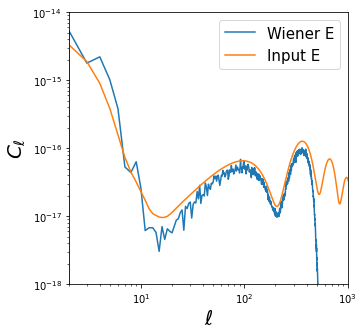

In [14]:
filt.plot_W_E(0)

In [29]:
kappa  = CoaddKappa(dire,2,2048,1024)

../lbxs4/utils.py:50: RuntimeWarning: invalid value encountered in true_divide
  cls[k][ell[idc]] = cols[i + 1][idc] / we[idc]
../lbxs4/multitracer.py:250: RuntimeWarning: divide by zero encountered in true_divide
  self.INls = np.array( [ 1./self.cov_n[:,:,l].diagonal() for l in range(lmax+1) ] ).T


In [32]:
kappa.coadd(0)

../lbxs4/multitracer.py:275: ComplexWarning: Casting complex values to real discards the imaginary part
  del (klm, kmap)


array([[ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [-1.73024229e-04+0.00000000e+00j, -1.13139107e-04-4.86680963e-05j,
         9.04240084e-05-9.88509378e-06j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       ...,
       [ 1.64225748e-07+0.00000000e+00j, -2.66489997e-07+1.02574174e-07j,
         6.64888473e-07+3.52487350e-07j, ...,
        -8.99980245e-28-4.45441312e-27j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [-4.51837555e-07+0.00000000e+00j,  3.

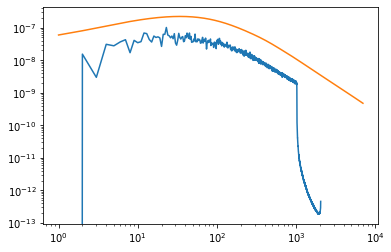

In [42]:
kappa.plot_coadd(0)

In [33]:
delens = Delenser(dire,filt,kappa)

In [34]:
lb = delens.lensing_B(0)

In [35]:
B= oldfilt.wiener_B(0)

In [36]:
b1 = cs.utils.alm2cl(1024,lb)
b2 = cs.utils.alm2cl(1024,B[:1025,:1025])
b12 = cs.utils.alm2cl(1024,lb,B[:1025,:1025])

In [37]:
rho = b12/np.sqrt(b1*b2)

/pscratch/sd/l/lonappan/software_pkgs/cmblens/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [38]:
rho[:100]

array([        nan,         nan, -0.54715399,  0.10084597,  0.49557046,
        0.32775133,  0.06775148,  0.40072612, -0.03239851,  0.13166071,
        0.68328144,  0.25831278,  0.42115349, -0.08515759,  0.25408265,
        0.50744726,  0.19791361,  0.38732872,  0.0937707 ,  0.23123013,
        0.24069113,  0.41620101,  0.43401088,  0.15710015,  0.41882237,
        0.19373547,  0.16559045,  0.24696452,  0.23321238,  0.16057026,
        0.36247669,  0.2029584 ,  0.07176169,  0.26432104,  0.49710635,
        0.33498723,  0.40669325,  0.49437053,  0.18468991,  0.5378279 ,
        0.32750108,  0.22750825,  0.22640003,  0.21108976,  0.28102451,
        0.33154689,  0.33958216,  0.21551791,  0.20597681,  0.32153421,
        0.26540142,  0.36264176,  0.31346983,  0.17672001,  0.30213444,
        0.35021195,  0.23528159,  0.27244088,  0.26934406,  0.0331995 ,
        0.36363323,  0.27367427,  0.21072389,  0.24615654,  0.21802085,
        0.25815499,  0.46633468,  0.3244373 ,  0.23496784,  0.22

In [39]:
rho[rho<0] = 0.33

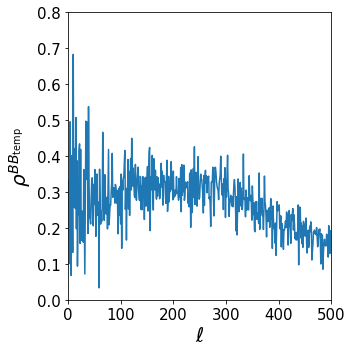

In [40]:
plt.figure(figsize=(5,5))
plt.plot(rho)
plt.xlim(0,500)
plt.ylim(0,0.8)
plt.xlabel(r'$\ell$',fontsize=20)
plt.ylabel(r'$\rho^{BB_\mathrm{temp}}$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig('rho_bbtemp.pdf',bbox_inches='tight',dpi=300)



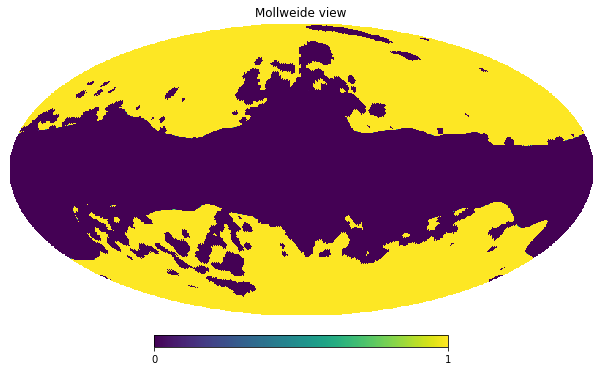

In [138]:
hp.mollview(kappa.masks['cib'])